### pip

In [1]:
!pip install pandas-profiling

In [2]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#conda create -n new_env python=3.8 scikit-learn imbalanced-learn
#conda activate new_env

In [4]:
pip install imbalanced-learn

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

### files

In [37]:
file1 = 'diabetes_012_health_indicators_BRFSS2015.csv' # This dataset contains prediabetes
file2 = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv' # This dataset is a 50/50 split of diabetes/no diabetes
file3 = 'diabetes_binary_health_indicators_BRFSS2015.csv' # This is the full dataset, with binary diabetes (0 or 1)

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)
data3 = pd.read_csv(file3)

df = pd.DataFrame(data3)
df_50_50_split = data2

### Visualizing the data

In [4]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


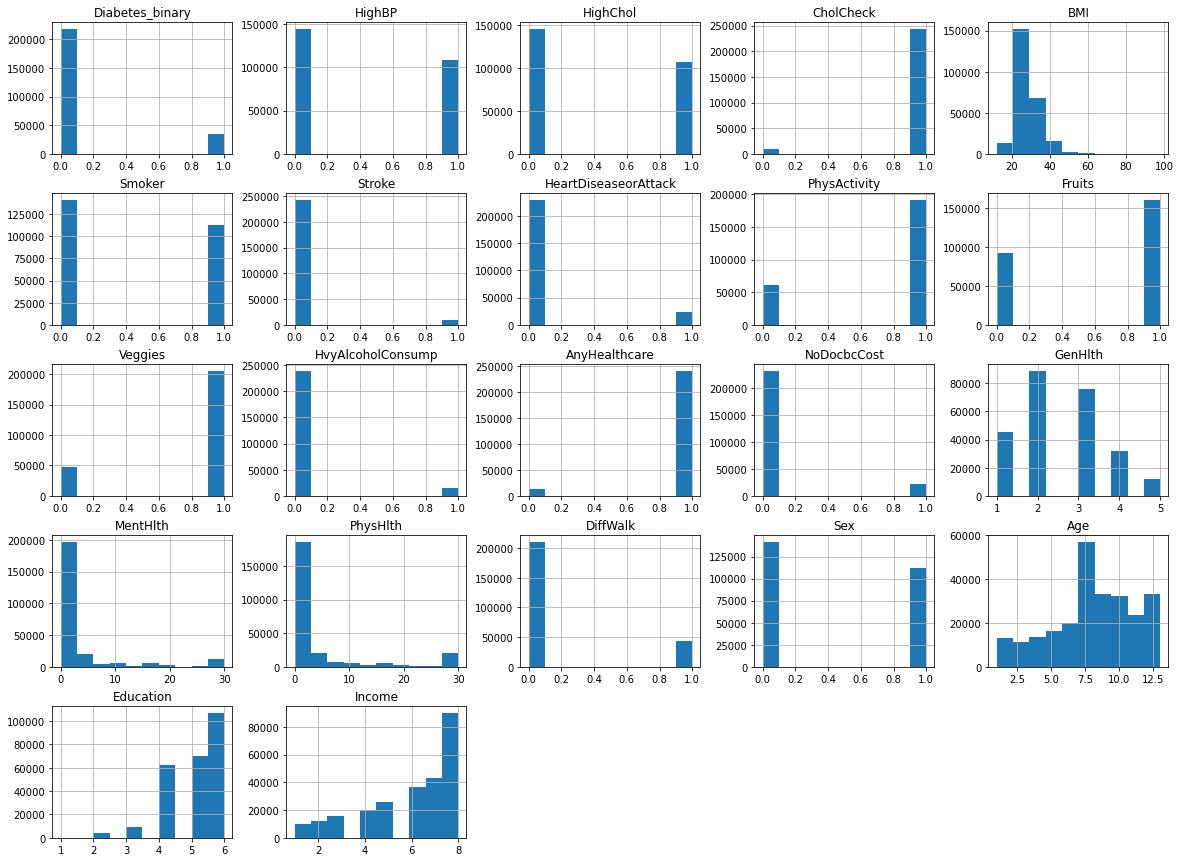

In [7]:
df.hist(figsize=(20,15));

### Sorting categorical and numerical values

#### Categorical variables - qualitative and describe a quality or characteristic.

Sex: Binary (0 = Female, 1 = Male).

DiffWalk (Difficulty Walking): Binary (0 = No, 1 = Yes).

NoDocbcCost (No Doctor because of Cost): Binary (0 = No, 1 = Yes).

AnyHealthcare (Any Kind of Healthcare Coverage): Binary (0 = No, 1 = Yes).

HvyAlcoholConsump (Heavy Alcohol Consumption): Binary (0 = No, 1 = Yes).

Veggies (Consumption of Vegetables): Binary (0 = No, 1 = Yes).

Fruits (Consumption of Fruit): Binary (0 = No, 1 = Yes).

PhysActivity (Physical Activity): Binary (0 = No, 1 = Yes).

HeartDiseaseorAttack (Coronary Heart Disease or Myocardial Infarction): Binary (0 = No, 1 = Yes).

Stroke: Binary (0 = No, 1 = Yes).

Smoker: Binary (0 = No, 1 = Yes).

CholCheck (Cholesterol Check): Binary (0 = No, 1 = Yes).

HighChol (High Cholesterol): Binary (0 = No, 1 = High Cholesterol).

HighBP (High Blood Pressure): Binary (0 = No, 1 = High BP).

Diabetes_binary (Diabetes Status): Categorical (0 = No Diabetes, 1 = Diabetes).

Age: Categorical, 13-level age category (e.g., 1 = 18-24, 9 = 60-64, 13 = 80 or older).

Education: Categorical, representing levels of education (scale 1-6).

Income: Categorical, representing income brackets (scale 1-8).

#### Numerical variables - quantitative and represent measurable quantities.

BMI (Body Mass Index): A continuous numerical value.

MentHlth (Mental Health): Represents the number of days in the past 30 days with mental health issues.

PhysHlth (Physical Health): Represents the number of days in the past 30 days with physical health issues.

GenHlth (General Health): Scale from 1 to 5, representing different levels of general health (1 = Excellent, 5 = Poor).

In [8]:
categorical_vars = ['Sex', 'DiffWalk', 'NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 
                    'Veggies', 'Fruits', 'PhysActivity', 'HeartDiseaseorAttack', 'Stroke', 
                    'Smoker', 'CholCheck', 'HighChol', 'HighBP', 'Diabetes_binary', 
                    'Age', 'Education', 'Income']
df_categorical = df[categorical_vars]

numerical_vars = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth']
df_numerical = df[numerical_vars]

#### Using spearman to handle the categorical/numerical and binary/ordinal differences

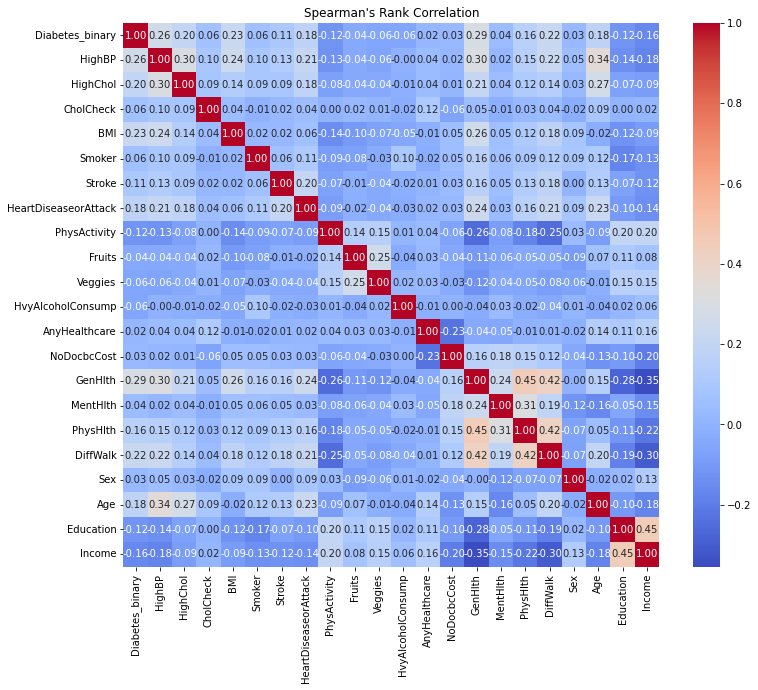

In [9]:
spearman_corr = df.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman's Rank Correlation")
plt.show()

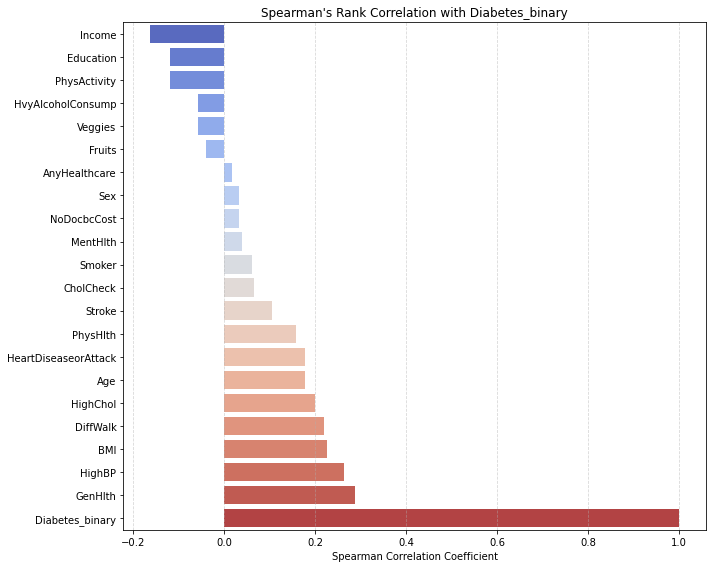

In [10]:
spearman_corr_with_target = df.corrwith(df['Diabetes_binary'], method='spearman').sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=spearman_corr_with_target.values, y=spearman_corr_with_target.index, palette="coolwarm")
plt.title("Spearman's Rank Correlation with Diabetes_binary")
plt.xlabel('Spearman Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


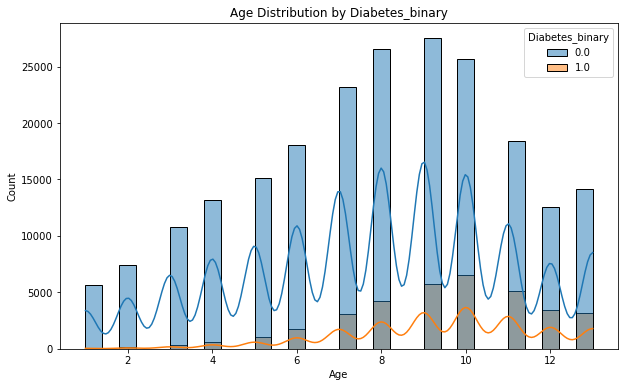

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Diabetes_binary', kde=True, bins=30)
plt.title('Age Distribution by Diabetes_binary')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Preprocessing

#### Handling duplicates and missing values

In [12]:
duplicates = df.duplicated().sum()
null_values = df.isnull().sum()

print(f"Number of duplicate rows: {duplicates}")
print()
print(f"Number of null values in each column: \n{null_values}")

Number of duplicate rows: 24206

Number of null values in each column: 
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [13]:
df = df.drop_duplicates()
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


#### Calculating odds

In [14]:
def calc_odds(df, target_var: str, visualization=False):
    """
    This function computes the odds ratio and the p-value for all binary independent variables.
    It selects only the variables with exactly two unique values (e.g., 0 and 1).
    If a non-binary variable is included, it raises an Exception.
    
    Parameters:
        df (DataFrame): The DataFrame to analyze.
        target_var (str): The name of the target variable column.
        visualization (bool): If True, plot a horizontal bar of the data.

    Returns:
        DataFrame: Contains variables, odds ratio, and p-value.
    """

    if df[target_var].nunique() != 2:
        raise ValueError("Target variable must be binary.")

    binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != target_var]

    results = {'variable': [], 'odds_ratio': [], 'p_val': []}

    for col in binary_cols:
        table = pd.crosstab(df[target_var], df[col])
        odds, p = stats.fisher_exact(table)
        results['variable'].append(col)
        results['odds_ratio'].append(odds)
        results['p_val'].append(p)

    result_df = pd.DataFrame(results)

    if visualization:
        OddsVisualization(result_df, 'variable', 'odds_ratio')

    return result_df

import matplotlib.pyplot as plt

def OddsVisualization(df, variablesCol_name: str, targetCol_name: str):
    """
    Creates a horizontal bar plot of the odds ratios (ranked).

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        variablesCol_name (str): Column name containing the variables.
        targetCol_name (str): Column name containing the Odds Ratios.
    """
    sorted_df = df.sort_values(by=targetCol_name, ascending=True)

    # Plotting
    plt.figure(figsize=(10, len(sorted_df) / 2))
    plt.barh(sorted_df[variablesCol_name], sorted_df[targetCol_name])
    plt.xlabel('Odds Ratio')
    plt.ylabel('Variables')
    plt.title('Odds Ratio Visualization')
    plt.show()

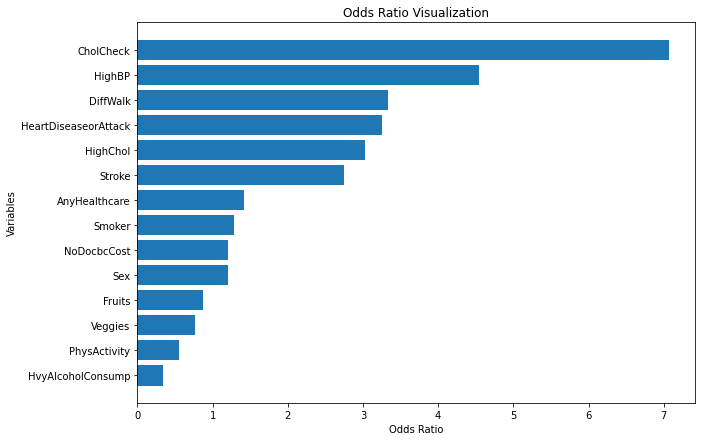

In [15]:
Oddsratios = calc_odds(df, 'Diabetes_binary', True)

In [16]:
Oddsratios.head()

,variable,odds_ratio,p_val
0,HighBP,4.546612,0.000000e+00
1,HighChol,3.031627,0.000000e+00
2,CholCheck,7.068424,0.000000e+00
3,Smoker,1.287552,4.356028e-105
4,Stroke,2.741881,0.000000e+00


### Splitting into training and test data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes_binary', axis=1), 
                                                    df['Diabetes_binary'], test_size=0.2, random_state=42)

### Info function

In [31]:
def info(y_test, y_pred):
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Logistic regression model 

In [32]:
logistic_model = LogisticRegression(max_iter=10000)  
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

info(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38813
         1.0       0.54      0.15      0.23      7082

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895

Confusion Matrix:
 [[37913   900]
 [ 6027  1055]]


The overall accuracy of this model was 86%. However to correctly present the model´s accuracy, we have to look at the other metrics.

For class 0 (No diabetes), the model correctly identified 98% of all 'No diabetes' cases, while 86% of the instances predicted as
'No diabetes' were actually 'No diabetes'. The high F1-score of 0.92 also suggests a good balance between precision and recall for
the class

For class 1 (diabetes) however, the model correctly identified 15% of all 'diabetes' cases, while only 54% of the instances predicted as 'diabetes' were actually 'diabetes'

#### Hyperparameters

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Different algorithms
    'penalty': ['l2'] 
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_logistic_model = grid_search.best_estimator_

best_logistic_model.fit(X_train, y_train)
y_pred_best = best_logistic_model.predict(X_test)

info(y_test, y_pred_best)

Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38813
         1.0       0.54      0.15      0.23      7082

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895

Confusion Matrix:
 [[37934   879]
 [ 6048  1034]]


- Results did not change

#### Applying smote to the model

In [ ]:
# Resampling the data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [18]:
smote = SMOTE(random_state=42)

logistic_model_smote = LogisticRegression(max_iter=1000)
logistic_model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = logistic_model_smote.predict(X_test)

info(y_test, y_pred_smote)

Classification Report (with SMOTE):
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38813
         1.0       0.32      0.75      0.45      7082

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.84      0.72      0.76     45895

Confusion Matrix (with SMOTE):
 [[27710 11103]
 [ 1799  5283]]


### Decision tree model

In [20]:
dt_params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5, 'sqrt', 'log2', None]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='recall', n_jobs=1)

dt_grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree:", dt_grid_search.best_params_)

Best Hyperparameters for Decision Tree: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [24]:
decision_tree_model = DecisionTreeClassifier(max_depth=None, 
                                             max_features=None, 
                                             min_samples_leaf=1, 
                                             min_samples_split=2)

decision_tree_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)

info(y_test, y_pred_dt)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     38813
         1.0       0.29      0.32      0.30      7082

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895

Confusion Matrix:
 [[33181  5632]
 [ 4826  2256]]


### Random forest model

In [21]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_distributions=rf_params, 
    n_iter=10,
    cv=3,
    scoring='recall', 
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:", rf_random_search.best_params_)

Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}


In [25]:
random_forest_model = RandomForestClassifier(n_estimators=100, 
                                             min_samples_split=2, 
                                             min_samples_leaf=2, 
                                             max_features=None, 
                                             max_depth=None,
                                             random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

info(y_test, y_pred_rf)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     38813
         1.0       0.49      0.19      0.28      7082

    accuracy                           0.84     45895
   macro avg       0.68      0.58      0.60     45895
weighted avg       0.81      0.84      0.81     45895

Confusion Matrix:
 [[37376  1437]
 [ 5705  1377]]


### XgBoost model

In [22]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

xgb_random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
    param_distributions=xgb_params, 
    n_iter=10, 
    cv=3,
    scoring='recall', 
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)

print("Best Hyperparameters for XGBoost:", xgb_random_search.best_params_)


Best Hyperparameters for XGBoost: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [26]:
xgboost_model = XGBClassifier(subsample=0.7,
                              n_estimators=200,
                              max_depth=9,
                              learning_rate=0.2,
                              colsample_bytree=1.0,
                              random_state=42)

xgboost_model.fit(X_train, y_train)

y_pred_xgb = xgboost_model.predict(X_test)

info(y_test, y_pred_xgb)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     38813
         1.0       0.48      0.20      0.28      7082

    accuracy                           0.84     45895
   macro avg       0.68      0.58      0.60     45895
weighted avg       0.81      0.84      0.82     45895

Confusion Matrix:
 [[37309  1504]
 [ 5670  1412]]


### Applying the LG model on the 50/50 dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_50_50_split.drop('Diabetes_binary', axis=1), 
                                                    df_50_50_split['Diabetes_binary'], test_size=0.2, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [40]:
logistic_model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = logistic_model_smote.predict(X_test)

info(y_test, y_pred_smote)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Confusion Matrix:
 [[5157 1933]
 [1625 5424]]
